# Question 1

### 1. Are there significant differences in the physical exercise among different groups in the United States?

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('final_sample.csv')
data.info(), data.head()

exercise_summary = data['X_pastae1'].value_counts()
exercise_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 330 entries, X_state to X_age80
dtypes: float64(100), object(230)
memory usage: 45.3+ MB


X_pastae1
Did not meet both guidelines    13907
Met both guidelines              2731
unknown                          1362
Name: count, dtype: int64

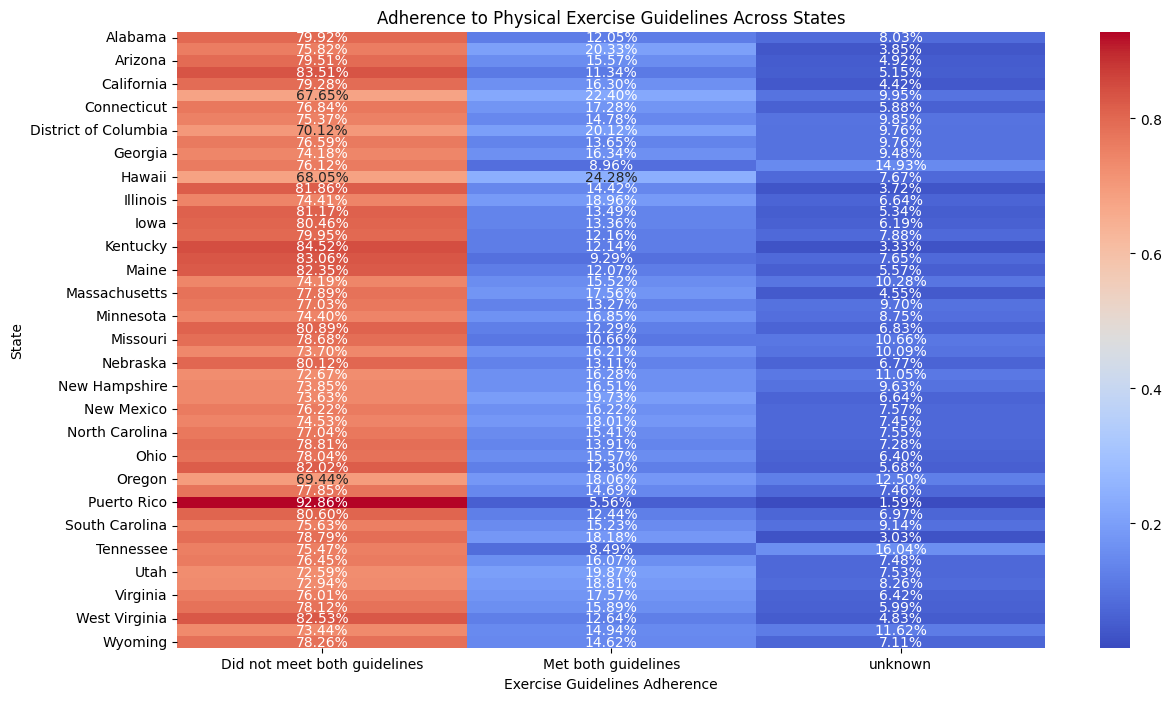

In [4]:
# Data preparation for visualization
state_exercise = data.groupby('X_state')['X_pastae1'].value_counts(normalize=True).unstack().fillna(0)

# Resetear el índice para que 'X_state' sea una columna y no un índice
state_exercise = state_exercise.reset_index()

plt.figure(figsize=(14, 8))
sns.heatmap(state_exercise.set_index('X_state'), annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Adherence to Physical Exercise Guidelines Across States')
plt.ylabel('State')
plt.xlabel('Exercise Guidelines Adherence')
plt.show()

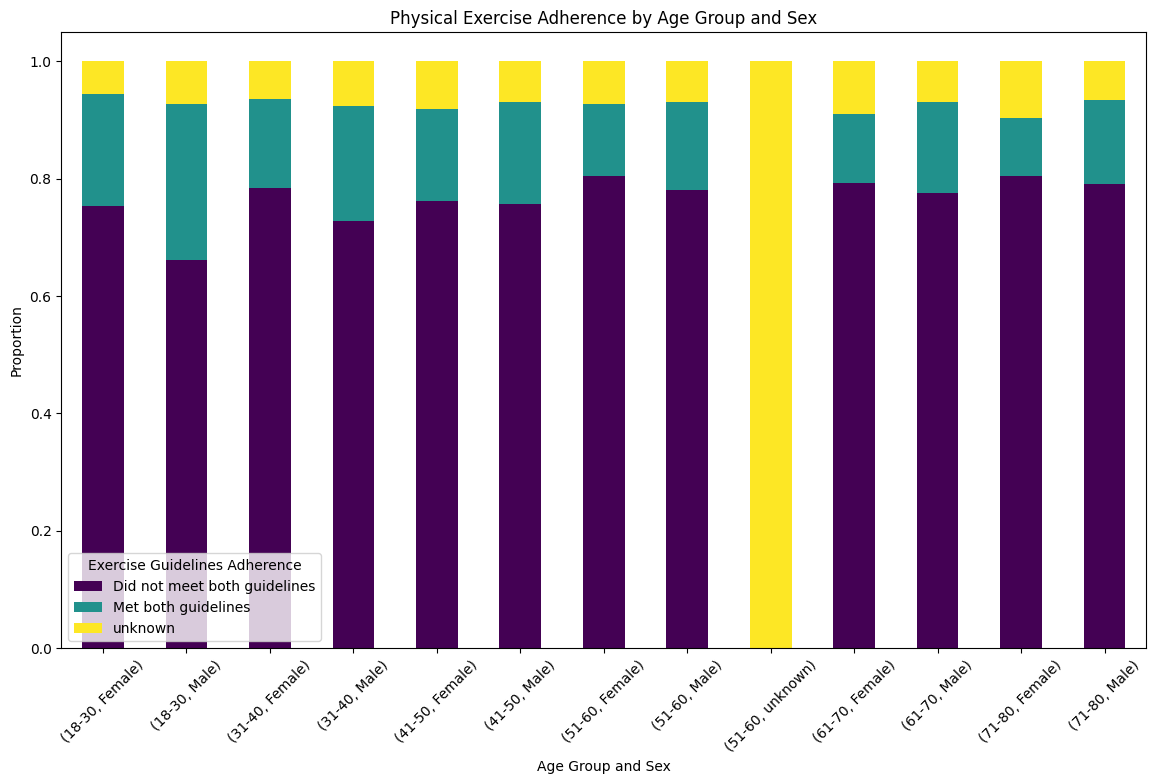

In [5]:
# Categorizing age data into groups
data['age_group'] = pd.cut(data['X_age80'],
                           bins=[17, 30, 40, 50, 60, 70, 80, 100],
                           labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

# Creating a cross-tabulation of age group and exercise adherence
age_exercise = pd.crosstab(index=[data['age_group'], data['sex']], columns=data['X_pastae1'], normalize='index')

age_exercise_plot = age_exercise.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Physical Exercise Adherence by Age Group and Sex')
plt.xlabel('Age Group and Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Exercise Guidelines Adherence')
plt.show()


In [6]:
age_exercise

X_pastae1          Did not meet both guidelines  Met both guidelines   unknown
age_group sex                                                                 
18-30     Female                       0.752632             0.192105  0.055263
          Male                         0.661778             0.265811  0.072411
31-40     Female                       0.783724             0.152731  0.063545
          Male                         0.727428             0.195911  0.076661
41-50     Female                       0.762351             0.156729  0.080920
          Male                         0.756480             0.174625  0.068895
51-60     Female                       0.804227             0.123471  0.072303
          Male                         0.780835             0.150369  0.068796
          unknown                      0.000000             0.000000  1.000000
61-70     Female                       0.792044             0.117825  0.090131
          Male                         0.774885             0.155692  0.069423
71-80     Female                       0.804357             0.099103  0.096540
          Male                         0.791351             0.143399  0.065250

In [27]:
categories = []
cat_means = []

for cat in age_exercise.index:
    if cat[1] != 'unknown':
        categories.append(cat)
        cat_means.append(age_exercise.loc[cat][1])


print(categories)
cat_means

[('18-30', 'Female'), ('18-30', 'Male'), ('31-40', 'Female'), ('31-40', 'Male'), ('41-50', 'Female'), ('41-50', 'Male'), ('51-60', 'Female'), ('51-60', 'Male'), ('61-70', 'Female'), ('61-70', 'Male'), ('71-80', 'Female'), ('71-80', 'Male')]


C:\Users\jesus\AppData\Local\Temp\ipykernel_16524\2220600850.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cat_means.append(age_exercise.loc[cat][1])


[0.19210526315789472,
 0.26581118240146656,
 0.1527313266443701,
 0.19591141396933562,
 0.1567291311754685,
 0.17462482946793997,
 0.12347052280311457,
 0.15036855036855037,
 0.11782477341389729,
 0.15569167942827974,
 0.09910294745835113,
 0.1433990895295903]

In [30]:
# Delete all the unknown rows
data = data[data['X_pastae1']!= 'unknown']

# Transform the 'X_pastae1' column
data['X_pastae1'] = data['X_pastae1'].apply(lambda x: 1 if x == 'Met both guidelines' else 0)

In [32]:
# Group by age_group and sex, and compute mean, std, and count for each group
grouped_data = data.reset_index().groupby(['age_group','sex'])['X_pastae1'].agg([
   'mean','std', 'count'
])

# Reset the index to get a flat table
grouped_data = grouped_data.reset_index()

# Rename the columns for clarity
grouped_data.columns = ['age_group','sex','mean','std','sample_size']
grouped_data

C:\Users\jesus\AppData\Local\Temp\ipykernel_16524\3171411713.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.reset_index().groupby(['age_group','sex'])['X_pastae1'].agg([


,age_group,sex,mean,std,sample_size
0,18-30,Female,0.203343,0.402766,718
1,18-30,Male,0.286561,0.452378,1012
2,31-40,Female,0.163095,0.369673,840
3,31-40,Male,0.212177,0.409038,1084
4,41-50,Female,0.170528,0.376271,1079
5,41-50,Male,0.187546,0.390492,1365
6,51-60,Female,0.133094,0.339778,1668
7,51-60,Male,0.161478,0.368068,1895
8,61-70,Female,0.129496,0.335841,1807
9,61-70,Male,0.167307,0.373352,1823


In [40]:
grouped_data.drop(grouped_data.tail(2).index, inplace=True)

grouped_data

,age_group,sex,mean,std,sample_size
0,18-30,Female,0.203343,0.402766,718
1,18-30,Male,0.286561,0.452378,1012
2,31-40,Female,0.163095,0.369673,840
3,31-40,Male,0.212177,0.409038,1084
4,41-50,Female,0.170528,0.376271,1079
5,41-50,Male,0.187546,0.390492,1365
6,51-60,Female,0.133094,0.339778,1668
7,51-60,Male,0.161478,0.368068,1895
8,61-70,Female,0.129496,0.335841,1807
9,61-70,Male,0.167307,0.373352,1823


**Anova Test**

In [37]:
def num_to_letter(n):
    return chr(65 + n)

print(num_to_letter(0))  # Outputs: A
print(num_to_letter(1))  # Outputs: B
print(num_to_letter(2))  # Outputs: C

A
B
C


In [50]:
populations =[]
groups = []

for i in range(len(grouped_data.index)):
    pop_mean = grouped_data.iloc[i]['mean']
    pop_std = grouped_data.iloc[i]['std']
    pop_size = grouped_data.iloc[i]['sample_size']
    normal_pop = np.random.normal(pop_mean, pop_std, pop_size)
    populations.append(normal_pop)

    groups.append(np.repeat(num_to_letter(i), pop_size))


np.random.seed(42)
data = pd.DataFrame({
    'dependent_variable': np.concatenate(populations),
    'grouping_variable': np.concatenate(groups)
})



In [53]:
import scipy.stats as stats

# One-way ANOVA
f_score, p_value = stats.f_oneway(
    data['dependent_variable'][data['grouping_variable']=='A'], 
    data['dependent_variable'][data['grouping_variable']=='B'], 
    data['dependent_variable'][data['grouping_variable']=='C'],
    data['dependent_variable'][data['grouping_variable']=='D'], 
    data['dependent_variable'][data['grouping_variable']=='E'], 
    data['dependent_variable'][data['grouping_variable']=='F'],
    data['dependent_variable'][data['grouping_variable']=='G'], 
    data['dependent_variable'][data['grouping_variable']=='H'], 
    data['dependent_variable'][data['grouping_variable']=='I'],
    data['dependent_variable'][data['grouping_variable']=='J'], 
    data['dependent_variable'][data['grouping_variable']=='K'], 
    data['dependent_variable'][data['grouping_variable']=='L']
    )

# Results
alpha = 0.05

print("F-score:", f_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is at least one pair of groups with statistically different means.")
else:
    print("Fail to reject the null hypothesis. There is no pair of groups with statistically different means.")


F-score: 18.57654850554743
P-value: 1.6497061972708732e-37
Reject the null hypothesis. There is at least one pair of groups with statistically different means.
